In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (14,6)


In [ ]:
from google.colab import files
files.upload()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [5]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-2640670821.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-2640670821.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
fig = px.line(
    df,
    x="Date",
    y="Estimated Unemployment Rate (%)",
    title="📉 Unemployment Rate Over Time",
    markers=True,
    template="plotly_dark"
)
fig.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



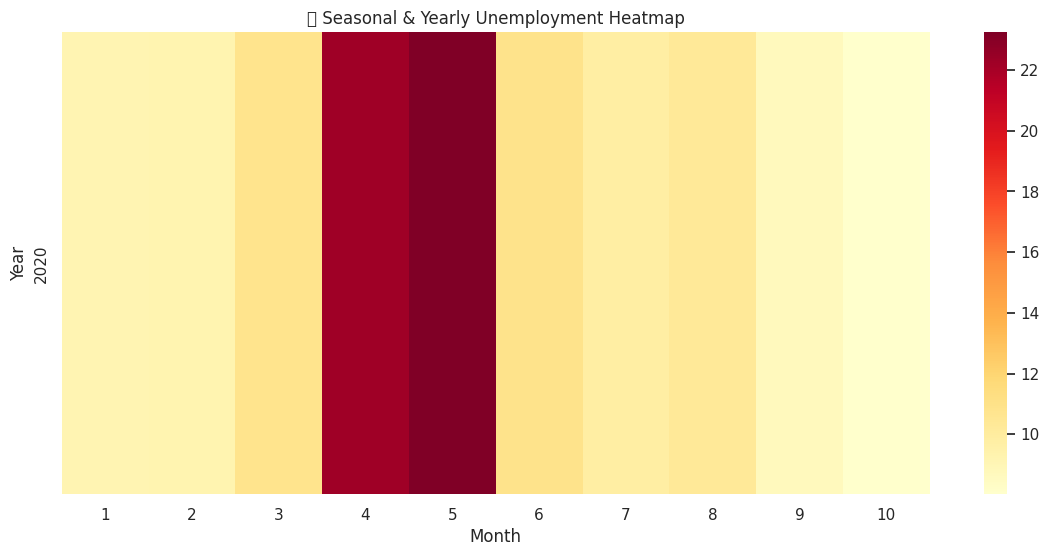

In [14]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

pivot = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Year', columns='Month')

sns.heatmap(pivot, cmap="YlOrRd")
plt.title("🔥 Seasonal & Yearly Unemployment Heatmap")
plt.show()

/tmp/ipython-input-774349452.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.



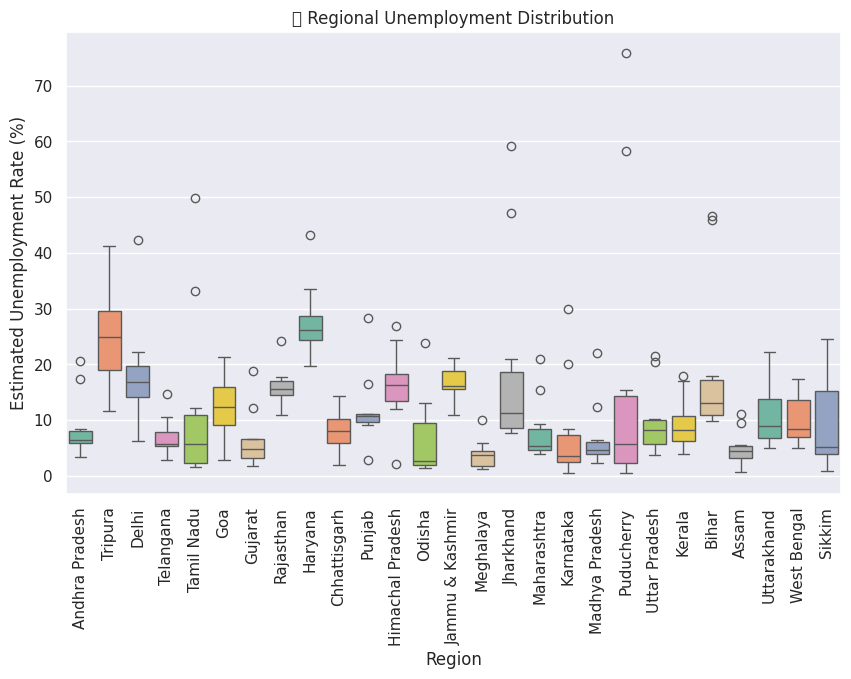

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Region',
    y='Estimated Unemployment Rate (%)',
    data=df,
    palette="Set2"
)
plt.title("🌾 Regional Unemployment Distribution")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.



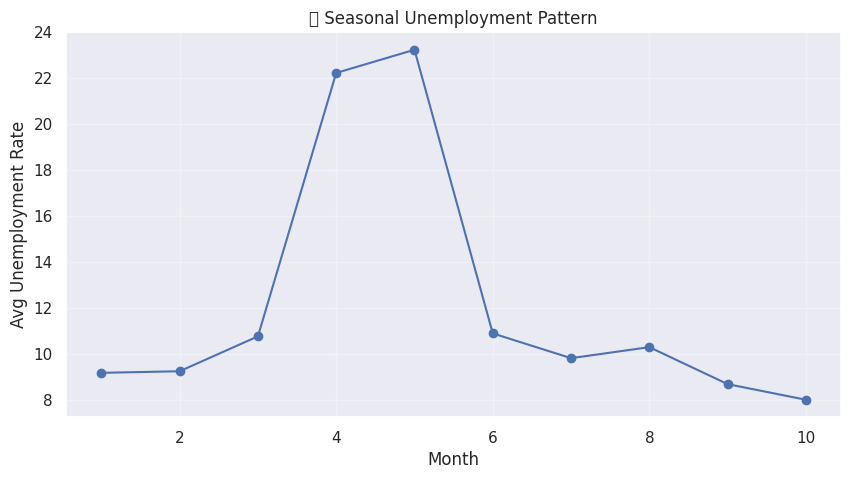

In [19]:
df['month'] = df['Date'].dt.month

monthly_avg = df.groupby('month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(marker='o')
plt.title("📆 Seasonal Unemployment Pattern")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate")
plt.grid(alpha=0.3)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129440 (\N{MICROBE}) missing from font(s) DejaVu Sans.



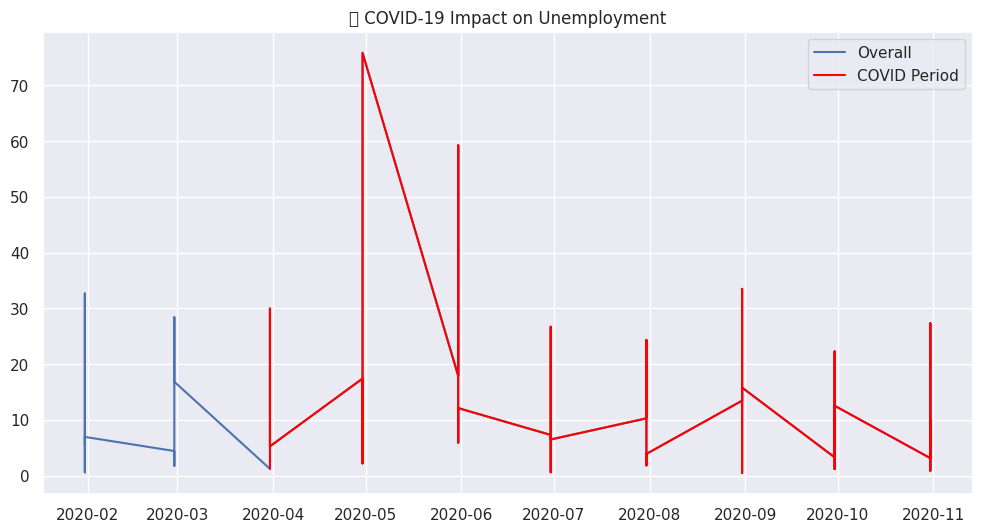

In [21]:
covid = df[(df['Date'] >= '2020-03') & (df['Date'] <= '2021-06')]

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label="Overall")
plt.plot(covid['Date'], covid['Estimated Unemployment Rate (%)'], color='red', label="COVID Period")
plt.legend()
plt.title("🦠 COVID-19 Impact on Unemployment")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.



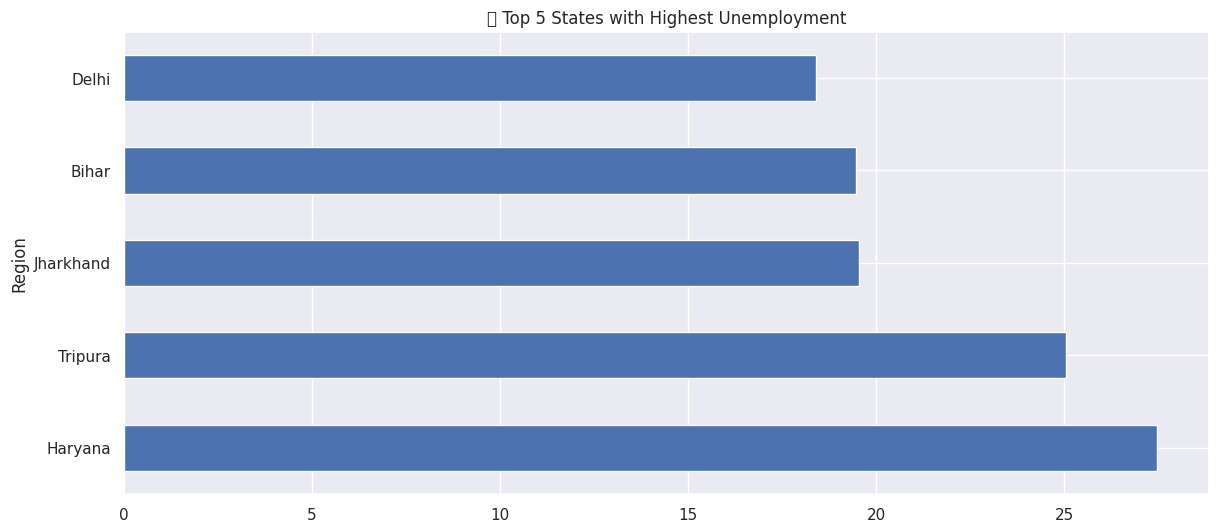

In [23]:
top_states = (
    df.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

top_states.plot(kind='barh', title="🚨 Top 5 States with Highest Unemployment")
plt.show()